In [ ]:
!nvidia-smi


Sun Apr 23 19:01:15 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.85.12    Driver Version: 525.85.12    CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   67C    P8    11W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
!git clone https://github.com/Franck-Dernoncourt/pubmed-rct.git
!ls pubmed-rct

Cloning into 'pubmed-rct'...
remote: Enumerating objects: 33, done.
remote: Counting objects: 100% (8/8), done.
remote: Compressing objects: 100% (3/3), done.
remote: Total 33 (delta 5), reused 5 (delta 5), pack-reused 25
Unpacking objects: 100% (33/33), 177.08 MiB | 9.14 MiB/s, done.
Updating files: 100% (13/13), done.
PubMed_200k_RCT
PubMed_200k_RCT_numbers_replaced_with_at_sign
PubMed_20k_RCT
PubMed_20k_RCT_numbers_replaced_with_at_sign
README.md


In [ ]:
!ls pubmed-rct/PubMed_20k_RCT_numbers_replaced_with_at_sign/

dev.txt  test.txt  train.txt


In [ ]:
data_dir = "/content/pubmed-rct/PubMed_20k_RCT_numbers_replaced_with_at_sign/"


In [ ]:
import os
filename = [data_dir+filename for filename in os.listdir(data_dir)]
filename

['/content/pubmed-rct/PubMed_20k_RCT_numbers_replaced_with_at_sign/dev.txt',
 '/content/pubmed-rct/PubMed_20k_RCT_numbers_replaced_with_at_sign/train.txt',
 '/content/pubmed-rct/PubMed_20k_RCT_numbers_replaced_with_at_sign/test.txt']

In [ ]:
def get_lines(filename):
  with open(filename, "r") as f:
    return f.readlines()

In [ ]:
train_lines = get_lines(data_dir+"train.txt")
train_lines[:20]

['###24293578\n',
 'OBJECTIVE\tTo investigate the efficacy of @ weeks of daily low-dose oral prednisolone in improving pain , mobility , and systemic low-grade inflammation in the short term and whether the effect would be sustained at @ weeks in older adults with moderate to severe knee osteoarthritis ( OA ) .\n',
 'METHODS\tA total of @ patients with primary knee OA were randomized @:@ ; @ received @ mg/day of prednisolone and @ received placebo for @ weeks .\n',
 'METHODS\tOutcome measures included pain reduction and improvement in function scores and systemic inflammation markers .\n',
 'METHODS\tPain was assessed using the visual analog pain scale ( @-@ mm ) .\n',
 'METHODS\tSecondary outcome measures included the Western Ontario and McMaster Universities Osteoarthritis Index scores , patient global assessment ( PGA ) of the severity of knee OA , and @-min walk distance ( @MWD ) .\n',
 'METHODS\tSerum levels of interleukin @ ( IL-@ ) , IL-@ , tumor necrosis factor ( TNF ) - , and 

In [ ]:
def preprocess_text(filename):
  input_lines = get_lines(filename)
  abstract_lines = ""
  list_of_dicts = []
  for line in input_lines:
    if line.startswith("###"):
      abstract_lines = ""
    elif line.isspace():
      abstract_line_split = abstract_lines.splitlines()
      for abstract_number,abstract_line in enumerate(abstract_line_split):
        dicts = {}
        target_text_split = abstract_line.split("\t")
        dicts["line_number"] = abstract_number
        dicts["target"] = target_text_split[0]
        dicts["text"] = target_text_split[1].lower()
        dicts["Total_lines"] = len(abstract_line_split) - 1
        list_of_dicts.append(dicts)
    else:
      abstract_lines += line
  return list_of_dicts


In [ ]:
train_samples = preprocess_text(data_dir+"train.txt")
val_samples = preprocess_text(data_dir+"dev.txt")
test_samples = preprocess_text(data_dir+"test.txt")
train_samples[:20]

[{'line_number': 0,
  'target': 'OBJECTIVE',
  'text': 'to investigate the efficacy of @ weeks of daily low-dose oral prednisolone in improving pain , mobility , and systemic low-grade inflammation in the short term and whether the effect would be sustained at @ weeks in older adults with moderate to severe knee osteoarthritis ( oa ) .',
  'Total_lines': 11},
 {'line_number': 1,
  'target': 'METHODS',
  'text': 'a total of @ patients with primary knee oa were randomized @:@ ; @ received @ mg/day of prednisolone and @ received placebo for @ weeks .',
  'Total_lines': 11},
 {'line_number': 2,
  'target': 'METHODS',
  'text': 'outcome measures included pain reduction and improvement in function scores and systemic inflammation markers .',
  'Total_lines': 11},
 {'line_number': 3,
  'target': 'METHODS',
  'text': 'pain was assessed using the visual analog pain scale ( @-@ mm ) .',
  'Total_lines': 11},
 {'line_number': 4,
  'target': 'METHODS',
  'text': 'secondary outcome measures include

In [ ]:
import pandas as pd
train_df = pd.DataFrame(train_samples)
val_df = pd.DataFrame(val_samples)
test_df = pd.DataFrame(test_samples)
train_df.head(14)

,line_number,target,text,Total_lines
0,0,OBJECTIVE,to investigate the efficacy of @ weeks of dail...,11
1,1,METHODS,a total of @ patients with primary knee oa wer...,11
2,2,METHODS,outcome measures included pain reduction and i...,11
3,3,METHODS,pain was assessed using the visual analog pain...,11
4,4,METHODS,secondary outcome measures included the wester...,11
5,5,METHODS,"serum levels of interleukin @ ( il-@ ) , il-@ ...",11
6,6,RESULTS,there was a clinically relevant reduction in t...,11
7,7,RESULTS,the mean difference between treatment arms ( @...,11
8,8,RESULTS,"further , there was a clinically relevant redu...",11
9,9,RESULTS,these differences remained significant at @ we...,11


In [ ]:
train_df.target.value_counts()

METHODS        59353
RESULTS        57953
CONCLUSIONS    27168
BACKGROUND     21727
OBJECTIVE      13839
Name: target, dtype: int64

<Axes: ylabel='Frequency'>

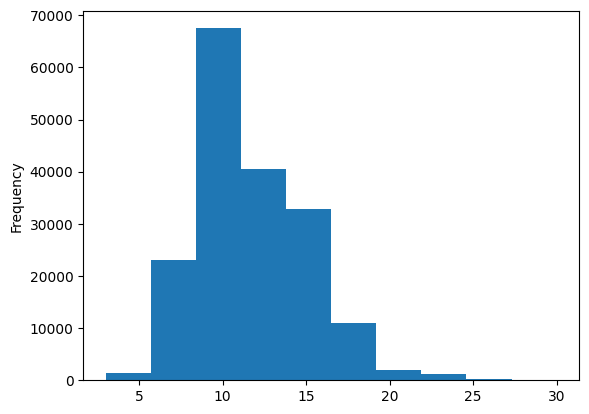

In [ ]:
train_df.Total_lines.plot.hist()

In [ ]:
train_sentences = train_df["text"].tolist()
val_sentences = val_df["text"].tolist()
test_sentences = test_df["text"].tolist()
len(train_sentences),len(val_sentences),len(test_sentences)

(180040, 30212, 30135)

In [ ]:
from sklearn.preprocessing import OneHotEncoder
one_hot_encoder = OneHotEncoder(sparse=False)
train_labels_one_hot = one_hot_encoder.fit_transform(train_df["target"].to_numpy().reshape(-1,1))
val_labels_one_hot = one_hot_encoder.transform(val_df["target"].to_numpy().reshape(-1,1))
test_labels_one_hot = one_hot_encoder.transform(test_df["target"].to_numpy().reshape(-1,1))

train_labels_one_hot

/usr/local/lib/python3.9/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


array([[0., 0., 0., 1., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0.],
       ...,
       [0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.]])

In [ ]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
train_label_encoded = label_encoder.fit_transform(train_df["target"].to_numpy().reshape(-1,1))
val_label_encoded = label_encoder.transform(val_df["target"].to_numpy().reshape(-1,1))
test_label_encoded = label_encoder.transform(test_df["target"].to_numpy().reshape(-1,1))
train_label_encoded

/usr/local/lib/python3.9/dist-packages/sklearn/preprocessing/_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.9/dist-packages/sklearn/preprocessing/_label.py:134: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)
/usr/local/lib/python3.9/dist-packages/sklearn/preprocessing/_label.py:134: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


array([3, 2, 2, ..., 4, 1, 1])

**MODEL-0 BASELINE**

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline

model_0 = Pipeline([
    ("tf-idf",TfidfVectorizer()),
    ("clf",MultinomialNB())
])

model_0.fit(X = train_sentences,
            y = train_label_encoded)

Pipeline(steps=[('tf-idf', TfidfVectorizer()), ('clf', MultinomialNB())])

In [ ]:
model_0.score(X = val_sentences,
              y = val_label_encoded)

0.7218323844829869

In [ ]:
baseline_preds = model_0.predict(val_sentences)
baseline_preds

array([4, 1, 3, ..., 4, 4, 1])

In [ ]:
!wget https://raw.githubusercontent.com/riya0920/DeepLearning_TensorFlow/main/helper_functions.py

--2023-04-23 19:01:53--  https://raw.githubusercontent.com/riya0920/DeepLearning_TensorFlow/main/helper_functions.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.111.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 11719 (11K) [text/plain]
Saving to: ‘helper_functions.py’

helper_functions.py 100%[===================>]  11.44K  --.-KB/s    in 0s      

2023-04-23 19:01:53 (81.1 MB/s) - ‘helper_functions.py’ saved [11719/11719]



In [ ]:
from sklearn.metrics import accuracy_score, precision_recall_fscore_support
def calc_results(y_true,y_preds):
  model_accuracy = accuracy_score(y_true, y_preds) * 100
  # Calculate model precision, recall and f1 score using "weighted" average
  model_precision, model_recall, model_f1, _ = precision_recall_fscore_support(y_true, y_preds, average="weighted")
  model_results = {"accuracy": model_accuracy,
                  "precision": model_precision,
                  "recall": model_recall,
                  "f1": model_f1}
  return model_results




Preparing our data(text) for deep sequence models!!

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers

In [ ]:
from tensorflow.keras.layers.experimental.preprocessing import TextVectorization
text_vectorizer = TextVectorization(max_tokens = 64000,
                                    output_sequence_length = 55) # 95% of the sentences have 55 words max

In [ ]:
text_vectorizer.adapt(train_sentences)

In [ ]:
import random
random_sentence = random.choice(train_sentences)
print(f"Text: {random_sentence}\nText vectorization: {text_vectorizer(random_sentence)}")

Text: one group received additional tuition using a training mannequin .
Text vectorization: [   88    13    80   365 43117    59     8   155 10274     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0]


In [ ]:
rct_20k_vocabulary = text_vectorizer.get_vocabulary()
rct_20k_vocabulary[:5],rct_20k_vocabulary[-5:]

(['', '[UNK]', 'the', 'and', 'of'],
 ['andbehavior', 'andat', 'andapplication', 'ancovamean', 'ancovaadjusted'])

In [ ]:
embedding = layers.Embedding(input_dim = len(rct_20k_vocabulary),
                             output_dim = 128,
                             mask_zero = True)

In [ ]:
print(f"Text: {random_sentence}\nVectorized sentence: {text_vectorizer(random_sentence)}\nEmbedded sentence: {embedding(text_vectorizer(random_sentence))}\nLength: {len(random_sentence.split())}")

Text: one group received additional tuition using a training mannequin .
Vectorized sentence: [   88    13    80   365 43117    59     8   155 10274     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0]
Embedded sentence: [[-0.01733092  0.02615828 -0.03877228 ...  0.01366481  0.01584483
  -0.00130222]
 [ 0.01337722 -0.03594701  0.02560658 ...  0.03701046  0.03135795
   0.00823929]
 [-0.0060894   0.03759834  0.04941158 ...  0.02661148 -0.02251431
   0.03768835]
 ...
 [-0.04837594 -0.02638235 -0.04100927 ...  0.0017076  -0.00684073
  -0.0150365 ]
 [-0.04837594 -0.02638235 -0.04100927 ...  0.0017076  -0.00684073
  -0.0150365 ]
 [-0.04837594 -0.02638235 -0.04100927 ...  0.0017076  -0.00684073
  -0.0150365 ]]
Length: 10


In [ ]:
train_dataset = tf.data.Dataset.from_tensor_slices((train_sentences,train_labels_one_hot))
valid_dataset = tf.data.Dataset.from_tensor_slices((val_sentences,val_labels_one_hot))
test_dataset = tf.data.Dataset.from_tensor_slices((test_sentences,test_labels_one_hot))

In [ ]:
train_dataset = train_dataset.batch(32).prefetch(tf.data.AUTOTUNE)
valid_dataset = valid_dataset.batch(32).prefetch(tf.data.AUTOTUNE)
test_dataset = test_dataset.batch(32).prefetch(tf.data.AUTOTUNE)

MODEL:1


In [ ]:
inputs = layers.Input(shape = (1,),dtype=tf.string)
x = text_vectorizer(inputs)
x = embedding(x)
x = layers.Conv1D(filters = 64,
                  kernel_size = 5,
                  padding = "valid",
                  activation = "relu")(x)
x = layers.GlobalMaxPool1D()(x)
outputs = layers.Dense(5,activation = "softmax")(x)
model_1 = tf.keras.Model(inputs,outputs)

model_1.compile(loss = "categorical_crossentropy",
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ["accuracy"])

history_1 = model_1.fit(train_dataset,
                        epochs = 5,
                        steps_per_epoch = int(0.1*len(train_dataset)),
                        validation_data = valid_dataset,
                        validation_steps = int(0.1*len(valid_dataset)))

Epoch 1/5
562/562 [==============================] - 45s 62ms/step - loss: 0.8409 - accuracy: 0.6781 - val_loss: 0.6036 - val_accuracy: 0.7726
Epoch 2/5
562/562 [==============================] - 8s 14ms/step - loss: 0.5888 - accuracy: 0.7835 - val_loss: 0.5515 - val_accuracy: 0.7886
Epoch 3/5
562/562 [==============================] - 7s 12ms/step - loss: 0.5529 - accuracy: 0.7953 - val_loss: 0.5322 - val_accuracy: 0.8078
Epoch 4/5
562/562 [==============================] - 5s 8ms/step - loss: 0.5303 - accuracy: 0.8060 - val_loss: 0.5329 - val_accuracy: 0.8005
Epoch 5/5
562/562 [==============================] - 6s 11ms/step - loss: 0.5345 - accuracy: 0.8085 - val_loss: 0.5081 - val_accuracy: 0.8108


In [ ]:
model_1.evaluate(valid_dataset)

945/945 [==============================] - 3s 3ms/step - loss: 0.5031 - accuracy: 0.8172


[0.5030754208564758, 0.81722491979599]

In [ ]:
model1_pred_probs= model_1.predict(valid_dataset)
model1_pred_probs

945/945 [==============================] - 2s 2ms/step


array([[3.4596369e-01, 4.4593474e-01, 2.1763779e-03, 1.7650141e-01,
        2.9423703e-02],
       [2.4435753e-01, 6.2110084e-01, 3.7658953e-03, 7.4998774e-02,
        5.5776976e-02],
       [3.7551826e-01, 1.6185148e-01, 3.2699112e-02, 4.2306396e-01,
        6.8671918e-03],
       ...,
       [4.6935843e-04, 2.4447720e-03, 2.7094306e-02, 2.1131846e-04,
        9.6978027e-01],
       [1.4879496e-02, 7.0709658e-01, 4.4206675e-02, 4.2121755e-03,
        2.2960509e-01],
       [1.5479704e-02, 9.6894550e-01, 8.1550321e-03, 9.3685702e-04,
        6.4828224e-03]], dtype=float32)

In [ ]:
model1_preds = tf.argmax(model1_pred_probs,axis = 1)
model1_preds


<tf.Tensor: shape=(30212,), dtype=int64, numpy=array([1, 1, 3, ..., 4, 1, 1])>

In [ ]:
model1_results = calc_results(y_true = val_label_encoded,
                              y_preds = model1_preds)
model1_results

{'accuracy': 81.7224943730968,
 'precision': 0.8185373259020514,
 'recall': 0.8172249437309679,
 'f1': 0.813942558750268}

Model - 2 feature Extraction with pre trained token embedding

In [ ]:
import tensorflow_hub as hub
tf_hub_embedding_layer = hub.KerasLayer("https://tfhub.dev/google/universal-sentence-encoder/4",
                                        trainable = False)

In [ ]:
print(f"Random sentence : {random_sentence}\nEmbedded sentence: {tf_hub_embedding_layer([random_sentence])}")

Random sentence : one group received additional tuition using a training mannequin .
Embedded sentence: [[-0.01171282 -0.00551874 -0.00928991 -0.00180128 -0.0724482   0.09077741
  -0.01491411 -0.01423826 -0.05510377 -0.06571155 -0.02025671  0.05375119
   0.05908729  0.03760116  0.00633753  0.00411843 -0.04163015 -0.01289274
  -0.03777574 -0.09227782 -0.05892019  0.06862921 -0.0633567   0.02790202
  -0.03265587  0.04872878 -0.0645288   0.05231309  0.06965381  0.05389299
   0.08697729 -0.00728618 -0.01186528 -0.05885765 -0.08400655  0.07425349
  -0.01763906 -0.05174532 -0.01541729  0.01323238 -0.0699873  -0.02283559
  -0.03888258 -0.00415054 -0.03148953  0.06506343  0.04517421 -0.00071498
   0.00010989  0.04747468 -0.03692305 -0.06788059  0.01183026 -0.0478655
   0.03007764 -0.05538524 -0.02029361  0.01426599  0.04406369  0.00969662
  -0.05652884  0.07845098 -0.05154875 -0.01780877 -0.01270808 -0.02996277
   0.07377068  0.02812844 -0.03944585  0.02445319 -0.0206679   0.04025995
  -0.0243

In [ ]:
inputs = layers.Input(shape =[],dtype=tf.string)
x = tf_hub_embedding_layer(inputs)
x = layers.Dense(128,activation="relu")(x)
outputs = layers.Dense(5,activation="softmax")(x)
model_2 = tf.keras.Model(inputs,outputs)

model_2.compile(loss = "categorical_crossentropy",
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ["accuracy"])

history_2 = model_2.fit(train_dataset,
                        epochs = 5,
                        steps_per_epoch = int(0.1*len(train_dataset)),
                        validation_data = valid_dataset,
                        validation_steps = int(0.1*len(valid_dataset)))

Epoch 1/5
562/562 [==============================] - 12s 16ms/step - loss: 0.9188 - accuracy: 0.6485 - val_loss: 0.7978 - val_accuracy: 0.6882
Epoch 2/5
562/562 [==============================] - 10s 17ms/step - loss: 0.7696 - accuracy: 0.7008 - val_loss: 0.7546 - val_accuracy: 0.7041
Epoch 3/5
562/562 [==============================] - 10s 18ms/step - loss: 0.7539 - accuracy: 0.7119 - val_loss: 0.7399 - val_accuracy: 0.7118
Epoch 4/5
562/562 [==============================] - 16s 29ms/step - loss: 0.7197 - accuracy: 0.7244 - val_loss: 0.7123 - val_accuracy: 0.7277
Epoch 5/5
562/562 [==============================] - 10s 18ms/step - loss: 0.7272 - accuracy: 0.7210 - val_loss: 0.6912 - val_accuracy: 0.7367


In [ ]:
model_2.evaluate(valid_dataset)

945/945 [==============================] - 11s 12ms/step - loss: 0.6987 - accuracy: 0.7347


[0.6987047791481018, 0.7347080707550049]

In [ ]:
model2_pred_probs = model_2.predict(valid_dataset)
model2_preds = tf.argmax(model2_pred_probs,axis = 1)
model2_preds

945/945 [==============================] - 11s 11ms/step


<tf.Tensor: shape=(30212,), dtype=int64, numpy=array([0, 1, 3, ..., 4, 2, 2])>

In [ ]:
model2_results = calc_results(y_true = val_label_encoded,
                              y_preds = model2_preds)

In [ ]:
model2_results

{'accuracy': 73.4708063021316,
 'precision': 0.7308940369796506,
 'recall': 0.7347080630213161,
 'f1': 0.7288826473083987}

In [ ]:
baseline_results = calc_results(y_true = val_label_encoded,
                                y_preds = baseline_preds)

In [ ]:
baseline_results

{'accuracy': 72.1832384482987,
 'precision': 0.7186466952323352,
 'recall': 0.7218323844829869,
 'f1': 0.6989250353450294}

In [ ]:
def split_chars(text):
  return " ".join(list(text))
split_chars(random_sentence)

'o n e   g r o u p   r e c e i v e d   a d d i t i o n a l   t u i t i o n   u s i n g   a   t r a i n i n g   m a n n e q u i n   .'

In [ ]:
train_chars = [split_chars(sentence) for sentence in train_sentences]
val_chars = [split_chars(sentence) for sentence in val_sentences]
test_chars  = [split_chars(sentence) for sentence in test_sentences]

In [ ]:
char_lens = [len(sentence) for sentence in train_sentences]
mean_char_len = np.mean(char_lens)
mean_char_len

149.3662574983337

In [ ]:
output_seq_char_len = int(np.percentile(char_lens,95))
output_seq_char_len

290

In [ ]:
import string
alphabet = string.ascii_lowercase + string.digits + string.punctuation
alphabet

'abcdefghijklmnopqrstuvwxyz0123456789!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [ ]:
num_of_char = len(alphabet)
char_vectorizer = TextVectorization(max_tokens = num_of_char,
                                    output_sequence_length = output_seq_char_len)

In [ ]:
char_vectorizer.adapt(train_chars)

In [ ]:
char_vocab = char_vectorizer.get_vocabulary()
char_vocab[:5], char_vocab[-5:],len(char_vocab)

(['', '[UNK]', 'e', 't', 'i'], ['k', 'x', 'z', 'q', 'j'], 28)

In [ ]:
random_train_chars = random.choice(train_chars)

vectorized_chars = char_vectorizer(random_train_chars)
random_train_chars, len(random_train_chars.split()),vectorized_chars,len(vectorized_chars)

('o v e r a l l   i n h a l e d   v o l u m e s   w e r e   l o w   ,   a n d   o n l y   o n e   p a t i e n t   a c h i e v e d   a n   i v   >   @ l   a n d   p   >   @ k p a   .',
 71,
 <tf.Tensor: shape=(290,), dtype=int64, numpy=
 array([ 7, 21,  2,  8,  5, 12, 12,  4,  6, 13,  5, 12,  2, 10, 21,  7, 12,
        16, 15,  2,  9, 20,  2,  8,  2, 12,  7, 20,  5,  6, 10,  7,  6, 12,
        19,  7,  6,  2, 14,  5,  3,  4,  2,  6,  3,  5, 11, 13,  4,  2, 21,
         2, 10,  5,  6,  4, 21, 12,  5,  6, 10, 14, 23, 14,  5,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
    

In [ ]:
embedding_char = layers.Embedding(input_dim = num_of_char,
                           output_dim = 25)


In [ ]:
random_train_chars,char_vectorizer(random_train_chars),embedding_char(char_vectorizer(random_train_chars))

('o v e r a l l   i n h a l e d   v o l u m e s   w e r e   l o w   ,   a n d   o n l y   o n e   p a t i e n t   a c h i e v e d   a n   i v   >   @ l   a n d   p   >   @ k p a   .',
 <tf.Tensor: shape=(290,), dtype=int64, numpy=
 array([ 7, 21,  2,  8,  5, 12, 12,  4,  6, 13,  5, 12,  2, 10, 21,  7, 12,
        16, 15,  2,  9, 20,  2,  8,  2, 12,  7, 20,  5,  6, 10,  7,  6, 12,
        19,  7,  6,  2, 14,  5,  3,  4,  2,  6,  3,  5, 11, 13,  4,  2, 21,
         2, 10,  5,  6,  4, 21, 12,  5,  6, 10, 14, 23, 14,  5,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         

Model - 3 COnv1d Char embeddings

In [ ]:
inputs = layers.Input(shape = (1,), dtype=tf.string)
x = char_vectorizer(inputs)
x = embedding_char(x)
x = layers.Conv1D(filters = 64,
                  kernel_size = 5,
                  padding = "same",
                  activation = "relu")(x)
x = layers.GlobalMaxPooling1D()(x)
outputs = layers.Dense(5,activation="softmax")(x)
model_3 = tf.keras.Model(inputs,outputs)

model_3.compile(loss = "categorical_crossentropy",
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ["accuracy"])
model_3.summary()

Model: "model_19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_16 (InputLayer)       [(None, 1)]               0         
                                                                 
 text_vectorization_1 (TextV  (None, 290)              0         
 ectorization)                                                   
                                                                 
 embedding_1 (Embedding)     (None, 290, 25)           1700      
                                                                 
 conv1d_2 (Conv1D)           (None, 290, 64)           8064      
                                                                 
 global_max_pooling1d_2 (Glo  (None, 64)               0         
 balMaxPooling1D)                                                
                                                                 
 dense_20 (Dense)            (None, 5)                 325

In [ ]:
train_chars_dataset = tf.data.Dataset.from_tensor_slices((train_chars,train_labels_one_hot)).batch(32).prefetch(tf.data.AUTOTUNE)
val_chars_dataset = tf.data.Dataset.from_tensor_slices((val_chars,val_labels_one_hot)).batch(32).prefetch(tf.data.AUTOTUNE)
test_chars_dataset = tf.data.Dataset.from_tensor_slices((test_chars,test_labels_one_hot)).batch(32).prefetch(tf.data.AUTOTUNE)
train_chars_dataset

<_PrefetchDataset element_spec=(TensorSpec(shape=(None,), dtype=tf.string, name=None), TensorSpec(shape=(None, 5), dtype=tf.float64, name=None))>

In [ ]:
history_3 = model_3.fit(train_chars_dataset,
                        epochs = 10,
                        steps_per_epoch = int(0.1*len(train_chars_dataset)),
                        validation_data = val_chars_dataset,
                        validation_steps = int(0.1*len(val_chars_dataset)))

Epoch 1/10
562/562 [==============================] - 4s 8ms/step - loss: 0.8689 - accuracy: 0.6637 - val_loss: 0.8314 - val_accuracy: 0.6832
Epoch 2/10
562/562 [==============================] - 4s 7ms/step - loss: 0.8349 - accuracy: 0.6748 - val_loss: 0.8048 - val_accuracy: 0.7008
Epoch 3/10
562/562 [==============================] - 3s 5ms/step - loss: 0.8169 - accuracy: 0.6871 - val_loss: 0.7929 - val_accuracy: 0.6981
Epoch 4/10
562/562 [==============================] - 3s 5ms/step - loss: 0.8072 - accuracy: 0.6921 - val_loss: 0.7703 - val_accuracy: 0.7035
Epoch 5/10
562/562 [==============================] - 3s 5ms/step - loss: 0.8056 - accuracy: 0.6909 - val_loss: 0.7727 - val_accuracy: 0.7028
Epoch 6/10
562/562 [==============================] - 4s 7ms/step - loss: 0.7936 - accuracy: 0.6960 - val_loss: 0.7580 - val_accuracy: 0.7078
Epoch 7/10
562/562 [==============================] - 3s 5ms/step - loss: 0.7898 - accuracy: 0.6952 - val_loss: 0.7536 - val_accuracy: 0.7138
Epoch 

In [ ]:
model_3.evaluate(val_chars_dataset)

945/945 [==============================] - 4s 4ms/step - loss: 0.8932 - accuracy: 0.6538


[0.8932242393493652, 0.6537799835205078]

In [ ]:
model3_pred_probs = model_3.predict(val_chars_dataset)
model3_pred_probs = tf.argmax(model3_pred_probs,axis = 1)
model3_pred_probs

945/945 [==============================] - 3s 3ms/step


<tf.Tensor: shape=(30212,), dtype=int64, numpy=array([1, 1, 3, ..., 4, 4, 0])>

In [ ]:
model3_results = calc_results(y_true = val_label_encoded,
             y_preds = model3_pred_probs)

In [ ]:
# 1. Create a token-level embedding model
token_inputs = layers.Input(shape=[],dtype=tf.string)
token_embeddings = tf_hub_embedding_layer(token_inputs)
token_outputs = layers.Dense(128,activation="relu")(token_embeddings)
token_model = tf.keras.Model(inputs = token_inputs,
                             outputs = token_outputs)

# 2. Create a char-level embedding model
char_inputs = layers.Input(shape = (1,),dtype = tf.string)
char_vectors = char_vectorizer(char_inputs)
char_embeddings = embedding_char(char_vectors)
char_bi_lstm = layers.Bidirectional(layers.LSTM(24))(char_embeddings)
char_model = tf.keras.Model(inputs = char_inputs,
                            outputs = char_bi_lstm)

# 3. Concatenate token-level embedding model and char-level embedding model - hybrid token embedding
token_char_concat = layers.Concatenate(name = "token_char_hybrid")([token_model.output,
                                                                    char_model.output])


# 4. Create output layers  - adding the Dropout layer(a layer which drops some patterns to avoid overfitting)
combined_dropout = layers.Dropout(0.5)(token_char_concat)
combined_dense = layers.Dense(128,activation="relu")(combined_dropout)
final_dropout = layers.Dropout(0.5)(combined_dense)
output_layer = layers.Dense(5,activation="softmax")(final_dropout)

# 5. Construct model with char and token level inputs
model_4 = tf.keras.Model(inputs = [token_model.input,char_model.input],
                         outputs = output_layer)


In [ ]:
model_4.summary()

Model: "model_5"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_5 (InputLayer)           [(None, 1)]          0           []                               
                                                                                                  
 input_4 (InputLayer)           [(None,)]            0           []                               
                                                                                                  
 text_vectorization_1 (TextVect  (None, 290)         0           ['input_5[0][0]']                
 orization)                                                                                       
                                                                                                  
 keras_layer (KerasLayer)       (None, 512)          256797824   ['input_4[0][0]']          

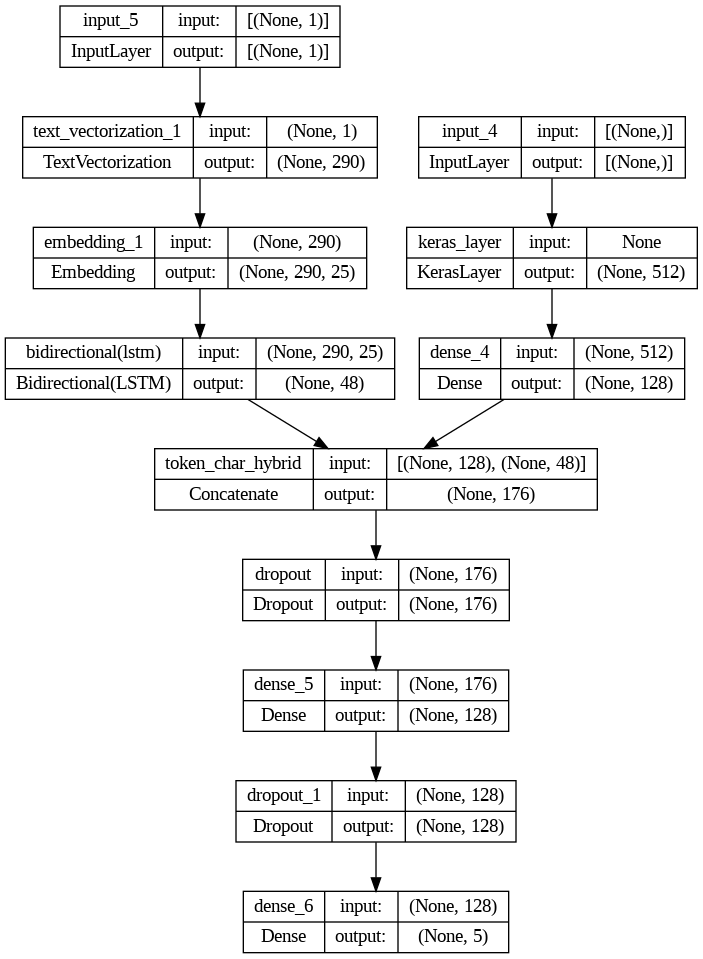

In [ ]:
from keras.utils import plot_model
plot_model(model_4,show_shapes = True)

In [ ]:
model_4.compile(loss = "categorical_crossentropy",
                optimizer = tf.keras.optimizers.SGD(),
                metrics = ["accuracy"])


In [ ]:
# Combining token and character data into tf.Data Dataset
#Combine chars and tokens into a dataset
train_token_char_data = tf.data.Dataset.from_tensor_slices((train_sentences,train_chars))
train_char_token_labels = tf.data.Dataset.from_tensor_slices((train_labels_one_hot))
train_char_token_dataset = tf.data.Dataset.zip((train_token_char_data,train_char_token_labels)).batch(32).prefetch(tf.data.AUTOTUNE)

In [ ]:
val_token_char_data = tf.data.Dataset.from_tensor_slices((val_sentences,val_chars))
val_char_token_labels = tf.data.Dataset.from_tensor_slices((val_labels_one_hot))
val_char_token_dataset = tf.data.Dataset.zip((val_token_char_data,val_char_token_labels)).batch(32).prefetch(tf.data.AUTOTUNE)

In [ ]:
history_4 = model_4.fit(train_char_token_dataset,
                        epochs = 5,
                        steps_per_epoch = int(0.1*len(train_char_token_dataset)),
                        validation_data = val_char_token_dataset,
                        validation_steps = int(0.1*len(val_char_token_dataset)))

Epoch 1/5
562/562 [==============================] - 27s 39ms/step - loss: 1.4937 - accuracy: 0.3377 - val_loss: 1.4503 - val_accuracy: 0.4166
Epoch 2/5
562/562 [==============================] - 20s 36ms/step - loss: 1.4434 - accuracy: 0.3814 - val_loss: 1.4175 - val_accuracy: 0.4744
Epoch 3/5
562/562 [==============================] - 19s 33ms/step - loss: 1.4071 - accuracy: 0.4238 - val_loss: 1.3587 - val_accuracy: 0.4967
Epoch 4/5
562/562 [==============================] - 21s 37ms/step - loss: 1.3408 - accuracy: 0.4571 - val_loss: 1.2669 - val_accuracy: 0.5183
Epoch 5/5
562/562 [==============================] - 19s 34ms/step - loss: 1.2628 - accuracy: 0.4888 - val_loss: 1.1603 - val_accuracy: 0.5389


In [ ]:
model_4.evaluate(val_char_token_dataset)

945/945 [==============================] - 19s 21ms/step - loss: 1.3568 - accuracy: 0.5233


[1.3568090200424194, 0.5233350992202759]

In [ ]:
model4_pred_probs = tf.argmax(model_4.predict(val_char_token_dataset),axis = 1)
model4_pred_probs

945/945 [==============================] - 18s 18ms/step


<tf.Tensor: shape=(30212,), dtype=int64, numpy=array([4, 4, 4, ..., 4, 4, 2])>

In [ ]:
model4_results = calc_results(y_true = val_label_encoded,
             y_preds = model4_pred_probs)

/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
model4_results

{'accuracy': 52.33350986363035,
 'precision': 0.34307231637246244,
 'recall': 0.5233350986363035,
 'f1': 0.41444972055616336}

In [ ]:
train_df["line_number"].value_counts()

0     15000
1     15000
2     15000
3     15000
4     14992
5     14949
6     14758
7     14279
8     13346
9     11981
10    10041
11     7892
12     5853
13     4152
14     2835
15     1861
16     1188
17      751
18      462
19      286
20      162
21      101
22       66
23       33
24       22
25       14
26        7
27        4
28        3
29        1
30        1
Name: line_number, dtype: int64

In [ ]:
train_line_number_one_hot = tf.one_hot(train_df["line_number"].to_numpy(),depth=15)
val_line_number_one_hot = tf.one_hot(val_df["line_number"].to_numpy(),depth=15)
test_line_number_one_hot = tf.one_hot(test_df["line_number"].to_numpy(),depth=15)
val_line_number_one_hot.shape, train_line_number_one_hot.shape,test_line_number_one_hot.shape
len(test_df["line_number"])

30135

In [ ]:
train_df["Total_lines"].value_counts()

11    24468
10    23639
12    22113
9     19400
13    18438
14    14610
8     12285
15    10768
7      7464
16     7429
17     5202
6      3353
18     3344
19     2480
20     1281
5      1146
21      770
22      759
23      264
4       215
24      200
25      182
26       81
28       58
3        32
30       31
27       28
Name: Total_lines, dtype: int64

<Axes: ylabel='Frequency'>

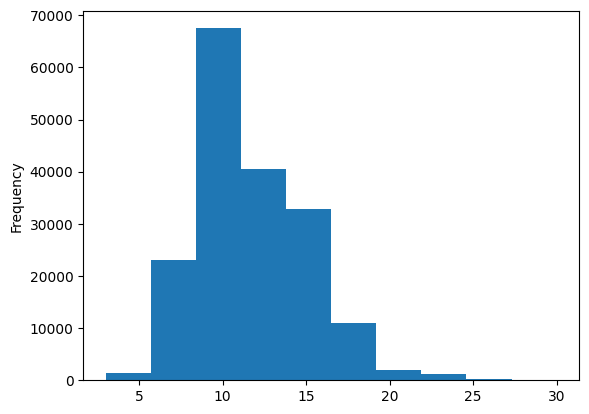

In [ ]:
train_df.Total_lines.plot.hist()

In [ ]:
np.percentile(train_df.Total_lines,98)

20.0

In [ ]:
train_total_lines_one_hot = tf.one_hot(train_df["Total_lines"].to_numpy(),depth=20)
val_total_lines_one_hot = tf.one_hot(val_df["Total_lines"].to_numpy(),depth=20)
test_total_lines_one_hot = tf.one_hot(test_df["Total_lines"].to_numpy(),depth=20)
train_total_lines_one_hot.shape,val_total_lines_one_hot.shape,test_total_lines_one_hot.shape
len(test_df["Total_lines"])

30135

In [ ]:
#1. Token Input model
token_inputs = layers.Input(shape=[],dtype=tf.string)
token_embeddings = tf_hub_embedding_layer(token_inputs)
token_outputs = layers.Dense(128,activation="relu")(token_embeddings)
token_model = tf.keras.Model(token_inputs,token_outputs)

#2. Character level model
char_inputs = layers.Input(shape = (1,),dtype=tf.string)
char_token = char_vectorizer(char_inputs)
char_embeds = embedding_char(char_token)
char_bi_lstm = layers.Bidirectional(layers.LSTM(24))(char_embeds)
char_model = tf.keras.Model(char_inputs,char_bi_lstm)

#3. Line number model
line_inputs = layers.Input(shape = (15,),dtype=tf.int64)
line_outputs = layers.Dense(32,activation="relu")(line_inputs)
line_number_model = tf.keras.Model(line_inputs,line_outputs)

#4. Total Line model
total_line_inputs = layers.Input(shape=(20,),dtype=tf.float32)
total_line_outputs = layers.Dense(32,activation="relu")(total_line_inputs)
total_line_model = tf.keras.Model(total_line_inputs,total_line_outputs)



#5. Combined embeddings
combined_embeddings = layers.Concatenate()([token_model.output,char_model.output])
combined_embedings_output = layers.Dense(256,activation="relu")(combined_embeddings)
z = layers.Dropout(0.5)(combined_embedings_output)

#6. Combined positional embeddings
tribid_embeddings = layers.Concatenate()([line_number_model.output,
                                          total_line_model.output,
                                          z])

#7. Create output layer
output_layer = layers.Dense(5,activation="softmax")(tribid_embeddings)

#8. Combine them into a model
model_5 = tf.keras.Model(inputs = [line_number_model.input,
                                   total_line_model.input,
                                   token_model.input,
                                   char_model.input],
                         outputs = output_layer)

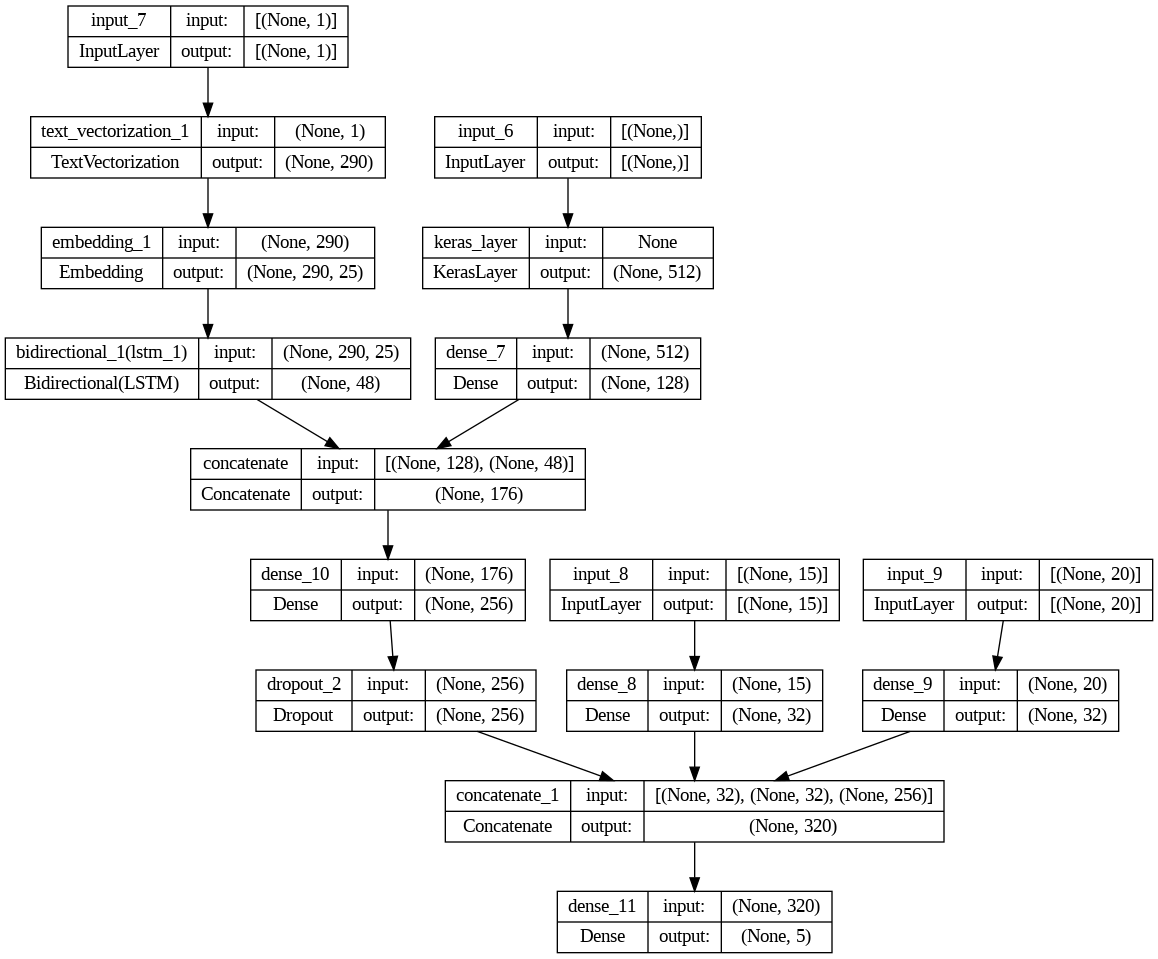

In [ ]:
from keras.utils import plot_model
plot_model(model_5,show_shapes = True)

In [ ]:
model_5.compile(loss = tf.keras.losses.CategoricalCrossentropy(label_smoothing = 0.2),
                optimizer = tf.keras.optimizers.SGD(),
                metrics = ["accuracy"])

In [ ]:
#Creating tribrid embedding dataset!!!
train_token_char_data = tf.data.Dataset.from_tensor_slices((train_line_number_one_hot,
                                                            train_total_lines_one_hot,
                                                            train_sentences,
                                                            train_chars))
train_char_token_labels = tf.data.Dataset.from_tensor_slices((train_labels_one_hot))
train_char_token_dataset = tf.data.Dataset.zip((train_token_char_data,train_char_token_labels)).batch(32).prefetch(tf.data.AUTOTUNE)

In [ ]:
val_token_char_data = tf.data.Dataset.from_tensor_slices((val_line_number_one_hot,
                                                          val_total_lines_one_hot,
                                                          val_sentences,
                                                          val_chars))
val_char_token_labels = tf.data.Dataset.from_tensor_slices((val_labels_one_hot))
val_char_token_dataset = tf.data.Dataset.zip((val_token_char_data,val_char_token_labels)).batch(32).prefetch(tf.data.AUTOTUNE)


test_token_char_data = tf.data.Dataset.from_tensor_slices((test_line_number_one_hot,
                                                          test_total_lines_one_hot,
                                                          test_sentences,
                                                          test_chars))
test_char_token_labels = tf.data.Dataset.from_tensor_slices((test_labels_one_hot))
test_char_token_dataset = tf.data.Dataset.zip((test_token_char_data,test_char_token_labels)).batch(32).prefetch(tf.data.AUTOTUNE)




In [ ]:
history_5 = model_5.fit(train_char_token_dataset,
                        epochs = 5,
                        steps_per_epoch = int(0.1 * len(train_char_token_dataset)),
                        validation_data = val_char_token_dataset,
                        validation_steps = int(0.1*len(val_char_token_dataset)))

Epoch 1/5
562/562 [==============================] - 19s 35ms/step - loss: 1.0272 - accuracy: 0.7640 - val_loss: 1.0086 - val_accuracy: 0.7769
Epoch 2/5
562/562 [==============================] - 19s 34ms/step - loss: 1.0144 - accuracy: 0.7739 - val_loss: 1.0044 - val_accuracy: 0.7822
Epoch 3/5
562/562 [==============================] - 20s 36ms/step - loss: 1.0133 - accuracy: 0.7747 - val_loss: 1.0022 - val_accuracy: 0.7816
Epoch 4/5
562/562 [==============================] - 20s 36ms/step - loss: 1.0125 - accuracy: 0.7807 - val_loss: 0.9993 - val_accuracy: 0.7846
Epoch 5/5
562/562 [==============================] - 20s 35ms/step - loss: 1.0121 - accuracy: 0.7797 - val_loss: 0.9969 - val_accuracy: 0.7859


In [ ]:
model_5.evaluate(val_char_token_dataset)


945/945 [==============================] - 18s 19ms/step - loss: 0.9974 - accuracy: 0.7889


[0.997391939163208, 0.7888918519020081]

In [ ]:
model5_pred_probs = model_5.predict(val_char_token_dataset)
model5_pred_probs = tf.argmax(model5_pred_probs,axis = 1)
model5_pred_probs

945/945 [==============================] - 33s 35ms/step


<tf.Tensor: shape=(30212,), dtype=int64, numpy=array([0, 0, 0, ..., 4, 4, 1])>

In [ ]:
calc_results(y_true = val_label_encoded,
             y_preds = model5_pred_probs)

{'accuracy': 78.88918310605058,
 'precision': 0.7882695816804781,
 'recall': 0.7888918310605058,
 'f1': 0.7830049193292681}